<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [2]:
from bs4 import BeautifulSoup
import requests

import pandas as pd

jobs = pd.DataFrame(pd.read_csv('data/job_listings.csv'))

#print(jobs)

In [3]:
# add desc column as parsed description
jobs['desc']=jobs['description']
desc = lambda x: BeautifulSoup(x['desc'], 'html.parser').get_text()
jobs['desc'] = jobs.apply(desc, axis=1)

#print(jobs['desc'])
#print(jobs)

In [4]:
# add text column as cleanest description

jobs['text']=jobs['desc']
text = lambda x: ("".join(" ".join(" ".join(x['text'].split("\\xe2\\x80\\xa6")).split("\\xe2\\x80\\x99")).split(" \xe2\x80\x93")))
jobs['text'] = jobs.apply(text, axis=1)


clean = lambda x: x['text'].replace(' \xe2\x80\x93',' ').replace('\\n',' ').replace('\n',' ').replace('b',"",1).replace("'", '').replace('"', '')
jobs['text'] = jobs.apply(clean, axis=1)

print(jobs['text'])
#print(jobs)
#jobs

0      Job Requirements: Conceptual understanding in ...
1      Job Description  As a Data Scientist 1, you wi...
2      As a Data Scientist you will be working on con...
3      $4,969 - $6,756 a monthContractUnder the gener...
4      Location: USA \xe2\x80\x93 multiple locations ...
                             ...                        
421    About Us: Want to be part of a fantastic and f...
422    InternshipAt Uber, we ignite opportunity by se...
423    $200,000 - $350,000 a yearA million people a y...
424    SENIOR DATA SCIENTIST JOB DESCRIPTION  ABOUT U...
425    Cerner Intelligence is a new, innovative organ...
Name: text, Length: 426, dtype: object


In [46]:
jobs['text'][0]

'job requirements conceptual understanding in machine learning models like naixcxave bayes kmeans svm apriori linear logistic regression neural random forests decision trees knn along with handson experience in at least  of them intermediate to expert level coding skills in pythonr ability to write functions clean and efficient data manipulation are mandatory for this role exposure to packages like numpy scipy pandas matplotlib etc in python or ggplot dplyr tidyr in r ability to communicate model findings to both technical and nontechnical stake holders hands on experience in sqlhive or similar programming language must show past work via github kaggle or any other published article masters degree in statisticsmathematicscomputer science or any other quant specific field apply now'

## 2) Use Spacy to tokenize the listings 

In [6]:
from spacy.tokenizer import Tokenizer
#Spacy tokenizer
nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)

#prepare text for t
lower = lambda x: re.sub('[^a-zA-Z ]', '', x['text']).lower()
jobs['text'] = jobs.apply(lower, axis=1)

# Make them tokens using the Tokenizer Pipe
# stop_tokens = []
# for doc in tokenizer.pipe(jobs['text'], batch_size=500):
#     doc_tokens = [token.text for token in doc]
#     stop_tokens.append(doc_tokens)

# jobs['stop_tokens'] = stop_tokens
# #jobs.head()
jobs

,Unnamed: 0,description,title,desc,text
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,"b""Job Requirements:\nConceptual understanding ...",job requirements conceptual understanding in m...
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"b'Job Description\n\nAs a Data Scientist 1, yo...",job description as a data scientist you will...
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,b'As a Data Scientist you will be working on c...,as a data scientist you will be working on con...
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"b'$4,969 - $6,756 a monthContractUnder the gen...",a monthcontractunder the general supervisio...
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b'Location: USA \xe2\x80\x93 multiple location...,location usa xexx multiple locations years of...
...,...,...,...,...,...
421,421,"b""<b>About Us:</b><br/>\nWant to be part of a ...",Senior Data Science Engineer,"b""About Us:\nWant to be part of a fantastic an...",about us want to be part of a fantastic and fu...
422,422,"b'<div class=""jobsearch-JobMetadataHeader icl-...",2019 PhD Data Scientist Internship - Forecasti...,"b'InternshipAt Uber, we ignite opportunity by ...",internshipat uber we ignite opportunity by set...
423,423,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist - Insurance,"b'$200,000 - $350,000 a yearA million people a...",a yeara million people a year die in car co...
424,424,"b""<p></p><div><p>SENIOR DATA SCIENTIST</p><p>\...",Senior Data Scientist,"b""SENIOR DATA SCIENTIST\nJOB DESCRIPTION\n\nAB...",senior data scientist job description about u...


In [7]:
from spacy.tokenizer import Tokenizer
#Spacy tokenizer
nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)
#Stop Words
nlp.Defaults.stop_words
STOP_WORDS = nlp.Defaults.stop_words.union(['ll','ve','location','locations','work','new','years','experience','skilss','s','job','requirements','description','month','year','data','scientist','analyst','multiple','usa','\xe2\x80\x93',' '])
#STOP_WORDS

In [8]:
#prepare text for t
lower = lambda x: re.sub('[^a-zA-Z ]', '', x['text']).lower()
jobs['text'] = jobs.apply(lower, axis=1)

# Make them tokens using the Tokenizer Pipe
spaCy_tokens = []
for doc in tokenizer.pipe(jobs['text'], batch_size=500):
    doc_tokens = []
    for token in doc:
        if token.text not in STOP_WORDS:
            doc_tokens.append(token.text)
    spaCy_tokens.append(doc_tokens)

jobs['spaCy_tokens'] = spaCy_tokens
jobs.head()


,Unnamed: 0,description,title,desc,text,spaCy_tokens
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,"b""Job Requirements:\nConceptual understanding ...",job requirements conceptual understanding in m...,"[conceptual, understanding, machine, learning,..."
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"b'Job Description\n\nAs a Data Scientist 1, yo...",job description as a data scientist you will...,"[help, build, machine, learning, models, pipel..."
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,b'As a Data Scientist you will be working on c...,as a data scientist you will be working on con...,"[working, consulting, business, responsible, a..."
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"b'$4,969 - $6,756 a monthContractUnder the gen...",a monthcontractunder the general supervisio...,"[ , monthcontractunder, general, supervision..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b'Location: USA \xe2\x80\x93 multiple location...,location usa xexx multiple locations years of...,"[xexx, analytics, understand, business, techni..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words=STOP_WORDS, max_features=1000)
# list of text documents
text = ["We created a new dataset which emphasizes diversity of content, by scraping content from the Internet."," In order to preserve document quality, we used only pages which have been curated/filtered by humans—specifically, we used outbound links from Reddit which received at least 3 karma."," This can be thought of as a heuristic indicator for whether other users found the link interesting (whether educational or funny), leading to higher data quality than other similar datasets, such as CommonCrawl."]
print('Text Length:',len(text))

#data=jobs['spaCy_tokens'][1]
#Learn our Vocab
vect.fit(text)
print(vect.get_feature_names())
print('No. Features:', len(vect.get_feature_names()))
# Get sparse dtm
#dtm = vect.transform(data)

#dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
#print(dtm)
jobs

Text Length: 3
['commoncrawl', 'content', 'created', 'curated', 'dataset', 'datasets', 'diversity', 'document', 'educational', 'emphasizes', 'filtered', 'found', 'funny', 'heuristic', 'higher', 'humans', 'indicator', 'interesting', 'internet', 'karma', 'leading', 'link', 'links', 'order', 'outbound', 'pages', 'preserve', 'quality', 'received', 'reddit', 'scraping', 'similar', 'specifically', 'thought', 'users']
No. Features: 35


,Unnamed: 0,description,title,desc,text,spaCy_tokens
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,"b""Job Requirements:\nConceptual understanding ...",job requirements conceptual understanding in m...,"[conceptual, understanding, machine, learning,..."
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"b'Job Description\n\nAs a Data Scientist 1, yo...",job description as a data scientist you will...,"[help, build, machine, learning, models, pipel..."
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,b'As a Data Scientist you will be working on c...,as a data scientist you will be working on con...,"[working, consulting, business, responsible, a..."
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"b'$4,969 - $6,756 a monthContractUnder the gen...",a monthcontractunder the general supervisio...,"[ , monthcontractunder, general, supervision..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b'Location: USA \xe2\x80\x93 multiple location...,location usa xexx multiple locations years of...,"[xexx, analytics, understand, business, techni..."
...,...,...,...,...,...,...
421,421,"b""<b>About Us:</b><br/>\nWant to be part of a ...",Senior Data Science Engineer,"b""About Us:\nWant to be part of a fantastic an...",about us want to be part of a fantastic and fu...,"[want, fantastic, fun, startup, revolutionizin..."
422,422,"b'<div class=""jobsearch-JobMetadataHeader icl-...",2019 PhD Data Scientist Internship - Forecasti...,"b'InternshipAt Uber, we ignite opportunity by ...",internshipat uber we ignite opportunity by set...,"[internshipat, uber, ignite, opportunity, sett..."
423,423,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist - Insurance,"b'$200,000 - $350,000 a yearA million people a...",a yeara million people a year die in car co...,"[ , yeara, million, people, die, car, collis..."
424,424,"b""<p></p><div><p>SENIOR DATA SCIENTIST</p><p>\...",Senior Data Scientist,"b""SENIOR DATA SCIENTIST\nJOB DESCRIPTION\n\nAB...",senior data scientist job description about u...,"[senior, amplion, synthesizes, world, biomedic..."


In [11]:
vector = lambda x: pd.DataFrame(vect.transform(x['spaCy_tokens']).todense(), columns=vect.get_feature_names())
jobs['dtm'] = jobs.apply(vector, axis=1)
jobs

,Unnamed: 0,description,title,desc,text,spaCy_tokens,dtm
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,"b""Job Requirements:\nConceptual understanding ...",job requirements conceptual understanding in m...,"[conceptual, understanding, machine, learning,...",commoncrawl content created curated da...
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"b'Job Description\n\nAs a Data Scientist 1, yo...",job description as a data scientist you will...,"[help, build, machine, learning, models, pipel...",commoncrawl content created curated d...
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,b'As a Data Scientist you will be working on c...,as a data scientist you will be working on con...,"[working, consulting, business, responsible, a...",commoncrawl content created curated da...
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"b'$4,969 - $6,756 a monthContractUnder the gen...",a monthcontractunder the general supervisio...,"[ , monthcontractunder, general, supervision...",commoncrawl content created curated d...
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b'Location: USA \xe2\x80\x93 multiple location...,location usa xexx multiple locations years of...,"[xexx, analytics, understand, business, techni...",commoncrawl content created curated da...
...,...,...,...,...,...,...,...
421,421,"b""<b>About Us:</b><br/>\nWant to be part of a ...",Senior Data Science Engineer,"b""About Us:\nWant to be part of a fantastic an...",about us want to be part of a fantastic and fu...,"[want, fantastic, fun, startup, revolutionizin...",commoncrawl content created curated d...
422,422,"b'<div class=""jobsearch-JobMetadataHeader icl-...",2019 PhD Data Scientist Internship - Forecasti...,"b'InternshipAt Uber, we ignite opportunity by ...",internshipat uber we ignite opportunity by set...,"[internshipat, uber, ignite, opportunity, sett...",commoncrawl content created curated d...
423,423,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist - Insurance,"b'$200,000 - $350,000 a yearA million people a...",a yeara million people a year die in car co...,"[ , yeara, million, people, die, car, collis...",commoncrawl content created curated d...
424,424,"b""<p></p><div><p>SENIOR DATA SCIENTIST</p><p>\...",Senior Data Scientist,"b""SENIOR DATA SCIENTIST\nJOB DESCRIPTION\n\nAB...",senior data scientist job description about u...,"[senior, amplion, synthesizes, world, biomedic...",commoncrawl content created curated d...


In [36]:
jobs['dtm'][4]

,commoncrawl,content,created,curated,data,dataset,datasets,diversity,document,educational,...,preserve,quality,received,reddit,scraping,similar,specifically,thought,used,users
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


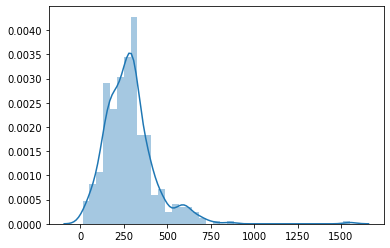

In [12]:
doc_len = [len(doc) for doc in jobs['dtm']]
import seaborn as sns

sns.distplot(doc_len);

## 4) Visualize the most common word counts

In [13]:
def count(docs):
    '''This function takes a list of tokenized documents as input and returns
    a dataframe with frequency counts and rank for each token.
    
    # Arguments
        docs: list, tokenized list of documents
        
    # Returns
        wc: dataframe, 
    '''
    
    word_counts = Counter()
    appears_in = Counter()

    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['pct_total'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [15]:
from collections import Counter
# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
jobs['spaCy_tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
print(word_counts.most_common(10))

# Tokens-Word Counts
wcTokens = count(jobs['spaCy_tokens'])
print(wcTokens.shape)
wcTokens.head()

# common = lambda x: count(jobs['spaCy_tokens'])
# jobs['common'] = jobs.apply(common, axis=1)
# jobs['common'][1]

[('business', 1181), ('team', 972), ('science', 934), ('learning', 897), ('analytics', 718), ('skills', 682), ('machine', 681), ('analysis', 672), ('models', 610), ('product', 570)]
(9465, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
271,business,321,1181,1.0,0.009782,0.009782,0.753521
184,team,339,972,2.0,0.008051,0.017833,0.795775
7,science,334,934,3.0,0.007736,0.025569,0.784038
45,learning,308,897,4.0,0.007430,0.032999,0.723005
333,analytics,248,718,5.0,0.005947,0.038946,0.582160


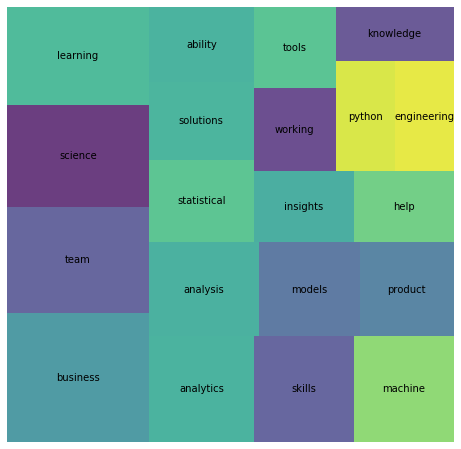

In [16]:
# Visualize Word Count
import squarify
wcTokens_top20 = wcTokens[wcTokens['rank'] <= 20]

plt.figure(figsize=(8,8))
squarify.plot(sizes=wcTokens_top20['pct_total'], label=wcTokens_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Create a vocabulary and get word counts per document
# Similiar to fit_predict
#dtm2 = tfidf.fit_transform(data)

# Print word counts

# Get feature names to use as dataframe column headers
dtm2 = lambda x: pd.DataFrame(tfidf.fit_transform(x['spaCy_tokens']).todense(), columns=tfidf.get_feature_names())
jobs['dtm2'] = jobs.apply(dtm2, axis=1)
# View Feature Matrix as DataFrame
#dtm2.head()
jobs

,Unnamed: 0,description,title,desc,text,spaCy_tokens,dtm,dtm2
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,"b""Job Requirements:\nConceptual understanding ...",job requirements conceptual understanding in m...,"[conceptual, understanding, machine, learning,...",commoncrawl content created curated da...,ability apply apriori article bayes c...
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"b'Job Description\n\nAs a Data Scientist 1, yo...",job description as a data scientist you will...,"[help, build, machine, learning, models, pipel...",commoncrawl content created curated d...,ability accolade according accuracy a...
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,b'As a Data Scientist you will be working on c...,as a data scientist you will be working on con...,"[working, consulting, business, responsible, a...",commoncrawl content created curated da...,ability actionable advanced algorithms ...
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"b'$4,969 - $6,756 a monthContractUnder the gen...",a monthcontractunder the general supervisio...,"[ , monthcontractunder, general, supervision...",commoncrawl content created curated d...,action advancing age analyzing applic...
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b'Location: USA \xe2\x80\x93 multiple location...,location usa xexx multiple locations years of...,"[xexx, analytics, understand, business, techni...",commoncrawl content created curated da...,analytics business create extraction h...
...,...,...,...,...,...,...,...,...
421,421,"b""<b>About Us:</b><br/>\nWant to be part of a ...",Senior Data Science Engineer,"b""About Us:\nWant to be part of a fantastic an...",about us want to be part of a fantastic and fu...,"[want, fantastic, fun, startup, revolutionizin...",commoncrawl content created curated d...,ab ability abstract ad adding addi...
422,422,"b'<div class=""jobsearch-JobMetadataHeader icl-...",2019 PhD Data Scientist Internship - Forecasti...,"b'InternshipAt Uber, we ignite opportunity by ...",internshipat uber we ignite opportunity by set...,"[internshipat, uber, ignite, opportunity, sett...",commoncrawl content created curated d...,accomplish accurate active actively a...
423,423,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist - Insurance,"b'$200,000 - $350,000 a yearA million people a...",a yeara million people a year die in car co...,"[ , yeara, million, people, die, car, collis...",commoncrawl content created curated d...,act action actuarial advanced affirma...
424,424,"b""<p></p><div><p>SENIOR DATA SCIENTIST</p><p>\...",Senior Data Scientist,"b""SENIOR DATA SCIENTIST\nJOB DESCRIPTION\n\nAB...",senior data scientist job description about u...,"[senior, amplion, synthesizes, world, biomedic...",commoncrawl content created curated d...,able accelerate actionable additional ...


In [41]:
tfidf = TfidfVectorizer(stop_words=STOP_WORDS, max_features=5000)
dtm2a = tfidf.fit_transform((jobs['dtm2'][1]))
#print(jobs['dtm2'])
#print((jobs['dtm2'][1]))
dtm2a = pd.DataFrame(dtm2a.todense(), columns=tfidf.get_feature_names())

dtm2a

,ability,accolade,according,accuracy,act,additional,afraid,agile,algorithm,analysis,...,unitfunctional,usable,user,way,ways,willingness,working,world,writing,written
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [42]:
jobs['dtm2'][2]

,ability,actionable,advanced,algorithms,analytical,analytics,analyzing,andor,applied,aspects,...,skills,statistical,statistics,support,testing,thorough,typical,validation,workfromhome,working
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
dtm_df=pd.DataFrame(jobs['dtm'])
dtm2_df=pd.DataFrame(jobs['dtm2'])
dtm2_df.shape

(426, 1)

## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [44]:
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm2a)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [45]:
nn.kneighbors([dtm2a.iloc[0].values])

(array([[0.        , 1.41421356, 1.41421356, 1.41421356, 1.41421356]]),
 array([[  0, 224, 226, 225, 222]], dtype=int64))

In [47]:
ideal = [ """job requirements conceptual understanding in machine learning models like naixcxave bayes kmeans svm apriori linear logistic regression neural random forests decision trees knn along with handson experience in at least  of them intermediate to expert level coding skills in pythonr ability to write functions clean and efficient data manipulation are mandatory for this role exposure to packages like numpy scipy pandas matplotlib etc in python or ggplot dplyr tidyr in r ability to communicate model findings to both technical and nontechnical stake holders hands on experience in sqlhive or similar programming language must show past work via github kaggle or any other published article masters degree in statisticsmathematicscomputer science or any other quant specific field apply now
"""]

In [48]:
# Query for Sim of Random doc to BBC
new = tfidf.transform(ideal)

In [49]:
nn.kneighbors(new.todense())

(array([[1.02819792, 1.23636381, 1.23636381, 1.23636381, 1.23636381]]),
 array([[  0, 244, 203, 210, 227]], dtype=int64))

In [52]:
jobs['spaCy_tokens'][244]

['zeus',
 'flawless',
 'stays',
 'founded',
 'november',
 'based',
 'san',
 'francisco',
 'california',
 'zeus',
 'shaking',
 'b',
 'corporate',
 'housing',
 'industry',
 'unique',
 'strategy',
 'leasing',
 'unfurnished',
 'privatelyowned',
 'homes',
 'converting',
 'expertly',
 'appointed',
 'fullservice',
 'corporate',
 'housing',
 'units',
 'today',
 'global',
 'professional',
 'passionate',
 'delivering',
 'worldclass',
 'customer',
 'service',
 'trusted',
 'provider',
 'corporate',
 'housing',
 'earth',
 'homes',
 'spanning',
 'san',
 'francisco',
 'bay',
 'area',
 'los',
 'angeles',
 'washington',
 'dc',
 'seattle',
 'cities',
 'coming',
 'soon',
 'way',
 'realizing',
 'vision',
 'zeus',
 'raised',
 'm',
 'financing',
 'initialized',
 'capital',
 'google',
 'ventures',
 'bowery',
 'capital',
 'floodgate',
 'zeus',
 'founders',
 'previous',
 'exits',
 'worked',
 'real',
 'estate',
 'technology',
 'role',
 'building',
 'models',
 'inform',
 'decisions',
 'property',
 'acquisition',

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 